In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ames-housing-dataset/AmesHousing.csv


In [2]:
data = pd.read_csv("/kaggle/input/ames-housing-dataset/AmesHousing.csv")

In [3]:
data.shape

(2930, 82)

In [4]:
data.info

<bound method DataFrame.info of       Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
3         4  526353030           20        RL          93.0     11160   Pave   
4         5  527105010           60        RL          74.0     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL          37.0      7937   Pave   
2926   2927  923276100           20        RL           NaN      8885   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   
2928   2929  924100070           20        RL          77.0     10010   Pave   
2929   2930  924151050           60        RL          74.0      9627   Pave   

     Al

In [5]:
data.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [6]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [7]:
data.tail()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000
2929,2930,924151050,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,188000


In [8]:
data.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [9]:
data.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

In [10]:
# Display all columns with their missing value counts
pd.set_option('display.max_rows', None)  # Ensure all rows are visible
missing_values = data.isnull().sum()
missing_columns = missing_values[missing_values > 0]  # Only columns with missing values
print(missing_columns)


Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64


Some of these columns have more than 50% of null values; meaning they are features that won't be useful

In [11]:
# Calculate the threshold for 50% missing values
threshold = len(data) * 0.5

# Identify columns with more than 50% missing values
columns_to_drop = data.columns[data.isnull().sum() > threshold]

# Drop those columns from the dataset
data = data.drop(columns=columns_to_drop, axis=1)

# Print the remaining columns to confirm
print(f"Columns dropped: {list(columns_to_drop)}")
print(f"Remaining columns: {data.columns}")


Columns dropped: ['Alley', 'Mas Vnr Type', 'Pool QC', 'Fence', 'Misc Feature']
Remaining columns: Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'F

In [12]:
# Identify remaining columns with missing data
remaining_missing = data.isnull().sum()
missing_columns = remaining_missing[remaining_missing > 0]

# Separate columns into numerical and categorical
numerical_missing = missing_columns[data[missing_columns.index].dtypes != 'object']
categorical_missing = missing_columns[data[missing_columns.index].dtypes == 'object']

# Print categorized columns
print("Numerical columns with missing data:")
print(numerical_missing)

print("\nCategorical columns with missing data:")
print(categorical_missing)


Numerical columns with missing data:
Lot Frontage      490
Mas Vnr Area       23
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Yr Blt     159
Garage Cars         1
Garage Area         1
dtype: int64

Categorical columns with missing data:
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin Type 2      81
Electrical           1
Fireplace Qu      1422
Garage Type        157
Garage Finish      159
Garage Qual        159
Garage Cond        159
dtype: int64


In [13]:
# Impute single missing value columns with the median
columns_to_impute = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 
                      'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 
                      'Garage Cars', 'Garage Area']
for col in columns_to_impute:
    data[col] = data[col].fillna(data[col].median())

# Lot Frontage: Fill with median or consider grouping by neighborhood for better imputation
data['Lot Frontage'] = data['Lot Frontage'].fillna(data['Lot Frontage'].median())

# Mas Vnr Area and Garage Yr Blt: Fill with 0 (indicating no masonry veneer or no garage year built)
data['Mas Vnr Area'] = data['Mas Vnr Area'].fillna(0)
data['Garage Yr Blt'] = data['Garage Yr Blt'].fillna(0)


In [14]:
data.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.019795,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.096928,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,21.326422,7880.017759,1.411026,1.111537,30.245361,20.860286,178.634545,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,60.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,78.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,162.750000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [15]:
# Fill basement-related columns and garage-related columns with 'None'
basement_cols = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 
                 'BsmtFin Type 1', 'BsmtFin Type 2']
garage_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
for col in basement_cols + garage_cols + ['Fireplace Qu']:
    data[col] = data[col].fillna('None')

# Fill Electrical with the most frequent value
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])


In [16]:
# Check if any missing values remain
print(data.isnull().sum().sum())  # Should return 0


0


SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647812
Garage Area        0.640381
Total Bsmt SF      0.632164
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Mas Vnr Area       0.502196
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432862
Lot Frontage       0.340256
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.275823
2nd Flr SF         0.269373
Lot Area           0.266549
Garage Yr Blt      0.253459
Bsmt Unf SF        0.182895
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.006018
Misc Val          -0.015691
Yr Sold           -0.030569
Order             -0.031408
Bsmt Half Bath    -0.035817
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0

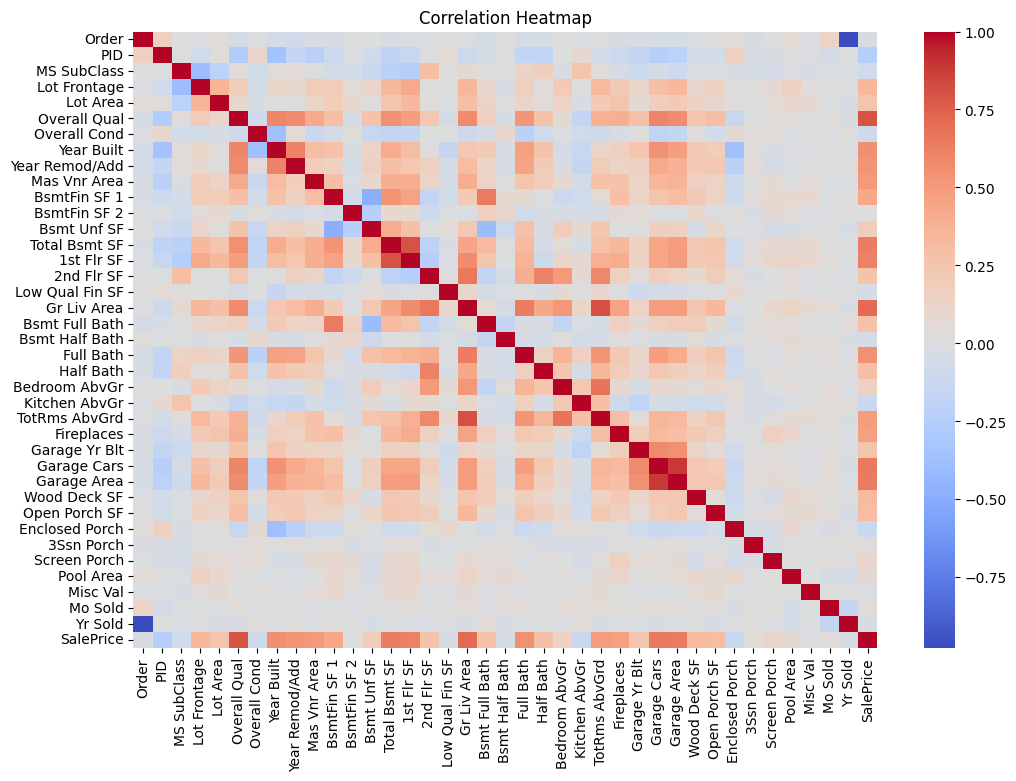

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')

# Check correlation with SalePrice
saleprice_corr = corr_matrix['SalePrice'].sort_values(ascending=False)
print(saleprice_corr)


In [18]:
# Summary statistics for SalePrice
saleprice_stats = data['SalePrice'].describe()
print(saleprice_stats)

# Skewness and kurtosis for SalePrice
saleprice_skew = data['SalePrice'].skew()
saleprice_kurtosis = data['SalePrice'].kurt()
print(f"Skewness: {saleprice_skew}")
print(f"Kurtosis: {saleprice_kurtosis}")


count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64
Skewness: 1.7435000757376466
Kurtosis: 5.118899951130896


In [19]:
# Summary statistics for SalePrice
saleprice_stats = data['SalePrice'].describe()
print(saleprice_stats)

# Skewness and kurtosis for SalePrice
saleprice_skew = data['SalePrice'].skew()
saleprice_kurtosis = data['SalePrice'].kurt()
print(f"Skewness: {saleprice_skew}")
print(f"Kurtosis: {saleprice_kurtosis}")


count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64
Skewness: 1.7435000757376466
Kurtosis: 5.118899951130896


In [20]:
# Counts for each neighborhood
neighborhood_counts = data['Neighborhood'].value_counts()
print(neighborhood_counts)


Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: count, dtype: int64


Text(0.5, 1.0, 'SalePrice by Neighborhood')

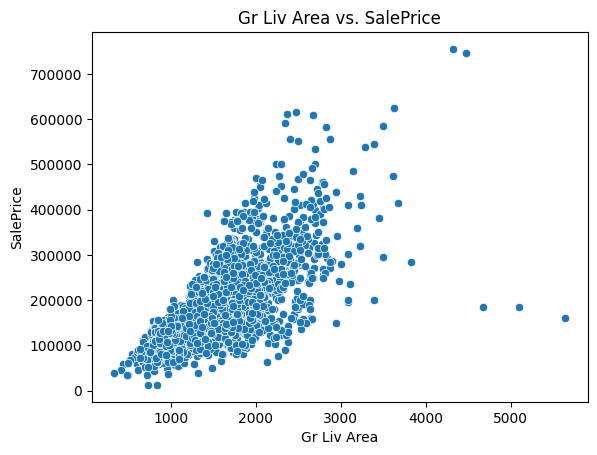

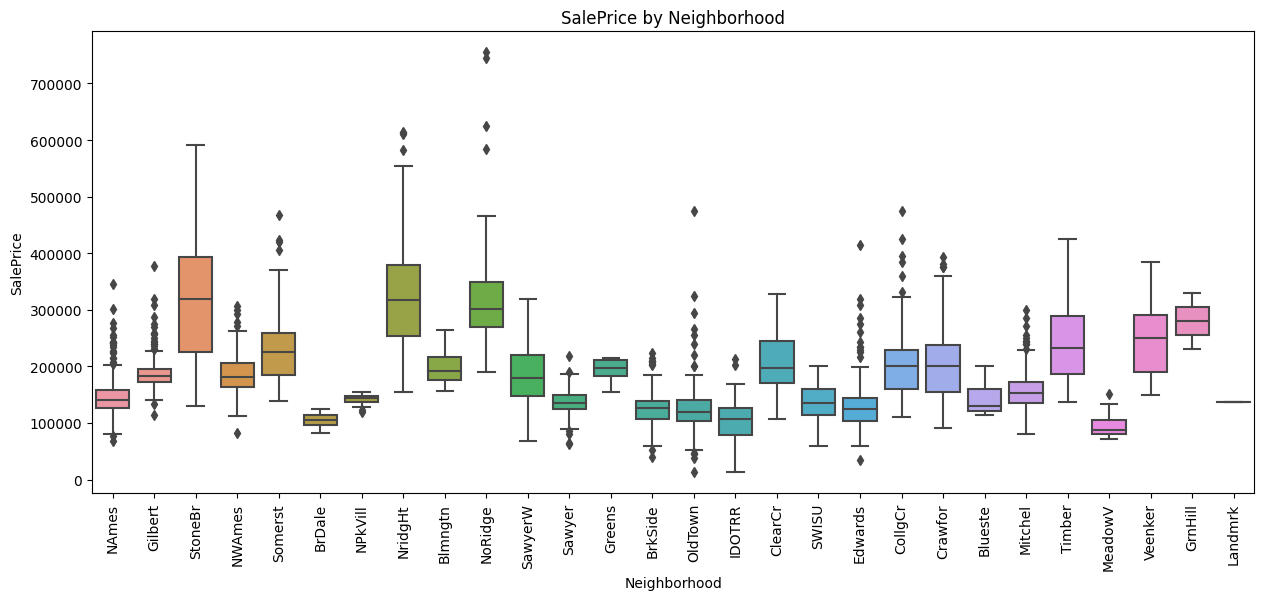

In [21]:
# Scatter plot for Gr Liv Area vs. SalePrice
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=data)
plt.title('Gr Liv Area vs. SalePrice')

# Boxplot for Neighborhood vs. SalePrice
plt.figure(figsize=(15, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=data)
plt.xticks(rotation=90)
plt.title('SalePrice by Neighborhood')


Text(0.5, 1.0, 'Total Bsmt SF vs. SalePrice')

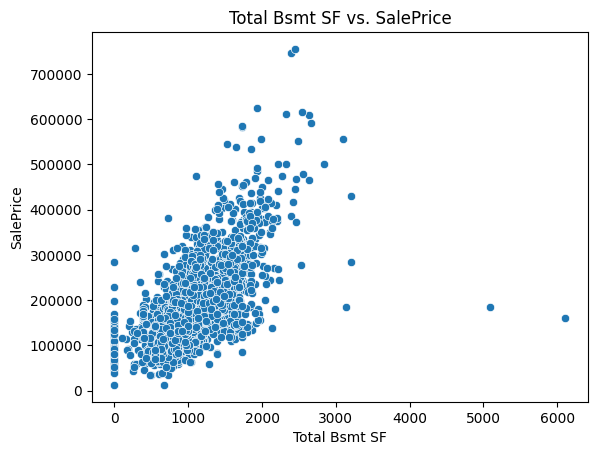

In [22]:
# Scatter plot to detect outliers
sns.scatterplot(x='Total Bsmt SF', y='SalePrice', data=data)
plt.title('Total Bsmt SF vs. SalePrice')


In [23]:
correlation = data['Gr Liv Area'].corr(data['SalePrice'])
print(f"Correlation between Gr Liv Area and SalePrice: {correlation:.2f}")

# Statistics for Gr Liv Area and SalePrice
gr_liv_area_stats = data[['Gr Liv Area', 'SalePrice']].describe()
print(gr_liv_area_stats)


Correlation between Gr Liv Area and SalePrice: 0.71
       Gr Liv Area      SalePrice
count  2930.000000    2930.000000
mean   1499.690444  180796.060068
std     505.508887   79886.692357
min     334.000000   12789.000000
25%    1126.000000  129500.000000
50%    1442.000000  160000.000000
75%    1742.750000  213500.000000
max    5642.000000  755000.000000


In [24]:
neighborhood_saleprice_summary = data.groupby('Neighborhood')['SalePrice'].agg(['mean', 'median', 'count']).sort_values(by='mean', ascending=False)
print(neighborhood_saleprice_summary)


                       mean    median  count
Neighborhood                                
NoRidge       330319.126761  302000.0     71
StoneBr       324229.196078  319000.0     51
NridgHt       322018.265060  317750.0    166
GrnHill       280000.000000  280000.0      2
Veenker       248314.583333  250250.0     24
Timber        246599.541667  232106.5     72
Somerst       229707.324176  225500.0    182
ClearCr       208662.090909  197500.0     44
Crawfor       207550.834951  200624.0    103
CollgCr       201803.434457  200000.0    267
Blmngtn       196661.678571  191500.0     28
Greens        193531.250000  198000.0      8
Gilbert       190646.575758  183000.0    165
NWAmes        188406.908397  181000.0    131
SawyerW       184070.184000  180000.0    125
Mitchel       162226.631579  153500.0    114
NAmes         145097.349887  140000.0    443
Blueste       143590.000000  130500.0     10
NPkVill       140710.869565  143750.0     23
Landmrk       137000.000000  137000.0      1
Sawyer    

Key EDA Conclusions:
SalePrice Correlation:

Most strongly correlated features: Overall Qual, Gr Liv Area, Garage Cars, Garage Area.
Usage in modeling: These features will be primary predictors for SalePrice in the modeling phase.
Outliers in Gr Liv Area:

Observation: High Gr Liv Area values have outliers that could skew models.
Usage in modeling: Consider handling outliers through capping, or log-transforming the feature to reduce impact.
Neighborhood Impact on SalePrice:

Observation: Some neighborhoods like NoRidge, StoneBr, NridgHt show high median prices, while others are lower.
Usage in modeling: Neighborhood should be encoded appropriately (e.g., One-Hot or Target Encoding).
Gr Liv Area vs. SalePrice Relationship:

Observation: Strong positive correlation; larger homes tend to have higher prices.
Usage in modeling: This feature is likely very predictive, and should remain untransformed unless handling outliers.
Feature Distribution and Skewness:

Observation: Some features like SalePrice are right-skewed.
Usage in modeling: Consider log-transforming skewed features to stabilize variance and improve modeling.
Missing Values:

Observation: Several numerical and categorical features have missing data.
Usage in modeling: Impute missing values (e.g., mean/median for numerical, mode for categorical) or drop rows/columns based on impact.
Temporal Features:

Observation: Year Built, Year Remod/Add, Yr Sold are potential sources of new features.
Usage in modeling: Create new features like House Age = Yr Sold - Year Built to improve model performance by capturing the age of the house.
Low-Impact Features:

Observation: Features like Pool Area, 3Ssn Porch, Screen Porch have little to no correlation with SalePrice.
Usage in modeling: Consider dropping or further analyzing these features if they don't add predictive value.
Next Steps Based on EDA:
Feature Engineering:

Create new features (House Age, interactions like Gr Liv Area * Overall Qual).
Encode categorical variables (Neighborhood, etc.).
Handling Missing Values:

Decide on imputation strategies based on feature type and impact.
Outlier Handling:

Address outliers in key features (e.g., Gr Liv Area) by capping or transforming the data.
Data Transformation:

Consider log-transforming skewed features (like SalePrice) for normalization.
Modeling:

Choose modeling techniques (e.g., linear regression, random forest, etc.) based on feature importance.
Train models and evaluate based on cross-validation and performance metrics.

In [25]:
# Create 'House Age' feature
data['House Age'] = data['Yr Sold'] - data['Year Built']

# Check basic stats for the new feature
print(data['House Age'].describe())


count    2930.000000
mean       36.434130
std        30.291357
min        -1.000000
25%         7.000000
50%        34.000000
75%        54.000000
max       136.000000
Name: House Age, dtype: float64


In [26]:
data['House Age'] = data['House Age'].apply(lambda x: max(x, 0))


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


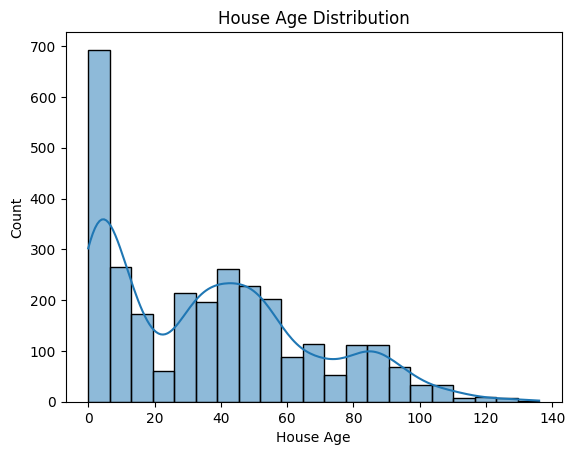

In [27]:
sns.histplot(data['House Age'], kde=True)
plt.title('House Age Distribution')
plt.show()


In [28]:
print(data.isnull().sum().sum())

0


In [29]:
# One-Hot Encoding Neighborhood
neighborhood_encoded = pd.get_dummies(data['Neighborhood'], drop_first=True)

# Concatenate the encoded columns back to the original dataset
data = pd.concat([data, neighborhood_encoded], axis=1)

# Drop the original 'Neighborhood' column
data.drop('Neighborhood', axis=1, inplace=True)

# Check the new shape of the dataset
print(data.shape)


(2930, 104)


In [30]:
# Display the first few rows of the new columns added by encoding
print(data.iloc[:, -len(neighborhood_encoded.columns):].head())


   Blueste  BrDale  BrkSide  ClearCr  CollgCr  Crawfor  Edwards  Gilbert  \
0    False   False    False    False    False    False    False    False   
1    False   False    False    False    False    False    False    False   
2    False   False    False    False    False    False    False    False   
3    False   False    False    False    False    False    False    False   
4    False   False    False    False    False    False    False     True   

   Greens  GrnHill  ...  NoRidge  NridgHt  OldTown  SWISU  Sawyer  SawyerW  \
0   False    False  ...    False    False    False  False   False    False   
1   False    False  ...    False    False    False  False   False    False   
2   False    False  ...    False    False    False  False   False    False   
3   False    False  ...    False    False    False  False   False    False   
4   False    False  ...    False    False    False  False   False    False   

   Somerst  StoneBr  Timber  Veenker  
0    False    False   False    Fals

In [31]:
print('Neighborhood' in data.columns)


False


In [32]:
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)


Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual',
       'Functional', 'Fireplace Qu', 'Garage Type', 'Garage Finish',
       'Garage Qual', 'Garage Cond', 'Paved Drive', 'Sale Type',
       'Sale Condition'],
      dtype='object')


In [33]:
# Calculate cardinality for MS Zoning and Heating QC based on domain knowledge
ms_zoning_cardinality = data['MS Zoning'].nunique()
heating_qc_cardinality = data['Heating QC'].nunique()

print(f"Cardinality of MS Zoning: {ms_zoning_cardinality}")
print(f"Cardinality of Heating QC: {heating_qc_cardinality}")


Cardinality of MS Zoning: 7
Cardinality of Heating QC: 5


In [34]:
# Perform one-hot encoding for correlation analysis
encoded_data = pd.get_dummies(data[['MS Zoning', 'Heating QC']], drop_first=True)

# Add SalePrice column to calculate correlation
encoded_data['SalePrice'] = data['SalePrice']

In [35]:
# Calculate correlation
correlation_matrix = encoded_data.corr()
ms_zoning_corr = correlation_matrix['SalePrice'].filter(like='MS Zoning')
heating_qc_corr = correlation_matrix['SalePrice'].filter(like='Heating QC')

print("\nCorrelation of MS Zoning with SalePrice:")
print(ms_zoning_corr)

print("\nCorrelation of Heating QC with SalePrice:")
print(heating_qc_corr)


Correlation of MS Zoning with SalePrice:
MS Zoning_C (all)   -0.117307
MS Zoning_FV         0.106706
MS Zoning_I (all)   -0.032879
MS Zoning_RH        -0.053581
MS Zoning_RL         0.244217
MS Zoning_RM        -0.292590
Name: SalePrice, dtype: float64

Correlation of Heating QC with SalePrice:
Heating QC_Fa   -0.130396
Heating QC_Gd   -0.132010
Heating QC_Po   -0.044797
Heating QC_TA   -0.338520
Name: SalePrice, dtype: float64


In [36]:
# Check the shape and head of the dataframe after encoding
print(encoded_data.shape)
print(encoded_data.head())

(2930, 11)
   MS Zoning_C (all)  MS Zoning_FV  MS Zoning_I (all)  MS Zoning_RH  \
0              False         False              False         False   
1              False         False              False          True   
2              False         False              False         False   
3              False         False              False         False   
4              False         False              False         False   

   MS Zoning_RL  MS Zoning_RM  Heating QC_Fa  Heating QC_Gd  Heating QC_Po  \
0          True         False           True          False          False   
1         False         False          False          False          False   
2          True         False          False          False          False   
3          True         False          False          False          False   
4          True         False          False           True          False   

   Heating QC_TA  SalePrice  
0          False     215000  
1           True     105000  
2  

In [37]:
# Merge the encoded columns back to the original dataset
data = pd.concat([data, encoded_data.drop(columns=['SalePrice'])], axis=1)


In [38]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,False,False,False,False,True,False,True,False,False,False
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,False,False,False,True,False,False,False,False,False,True
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,False,False,False,False,True,False,False,False,False,True
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,False,False,False,False,True,False,False,False,False,False
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,False,False,False,False,True,False,False,True,False,False


1. Finalizing Feature Set
What to Do:
Select the features that will be included in the model. Based on earlier discussions:
Strong numerical predictors: Overall Qual, Gr Liv Area, Garage Cars, etc.
Encoded categorical features: Neighborhood (already one-hot encoded), MS Zoning, and Heating QC.
Why:
This ensures we are only using features that contribute meaningfully to predicting SalePrice without introducing noise or redundancy.
2. Handling Skewed Features (if any)
What to Do:
Apply log transformation to SalePrice or other skewed numerical features, like Gr Liv Area, to normalize their distribution.
Why:
Many machine learning algorithms perform better with normally distributed data, especially when using linear models.
3. Scaling and Normalization
What to Do:
Normalize numerical features (e.g., MinMaxScaler or StandardScaler).
Why:
Some algorithms (e.g., SVM, Logistic Regression) are sensitive to feature scaling, ensuring all features contribute equally.
4. Train-Test Split
What to Do:
Split the data into training and testing sets (e.g., 80/20 split).
Why:
Evaluate the model's generalization on unseen data.
5. Modeling
What to Do:
Select appropriate models to predict SalePrice. Options include:
Linear Regression: Simple and interpretable.
Random Forest: Robust to non-linear relationships.
Gradient Boosting (e.g., XGBoost or LightGBM): Often performs best in tabular data.
Why:
Different algorithms have strengths based on the feature set and data complexity.
6. Hyperparameter Tuning
What to Do:
Use GridSearchCV or RandomizedSearchCV to optimize model parameters.
Why:
Boost model performance by finding the best parameter values.
7. Model Evaluation
What to Do:
Evaluate model performance using metrics like:
RMSE (Root Mean Squared Error)
R² (Coefficient of Determination)
Why:
These metrics give insight into how well the model predicts SalePrice.
8. Feature Importance Analysis
What to Do:
Analyze which features are most predictive in the model.
Why:
This helps refine future models or provide insights into the most influential factors.
9. Finalize and Save the Model
What to Do:
Export the final trained model (e.g., using joblib or pickle) for deployment or further analysis.
Why:
This ensures the model can be reused without retraining.
Optional: Validation on Hold-Out Data

In [39]:
numerical_features = ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 
                      'Garage Area', 'Total Bsmt SF', '1st Flr SF']


In [40]:
# All one-hot encoded columns from 'Neighborhood'
neighborhood_encoded_cols = list(neighborhood_encoded.columns)

# All one-hot encoded columns from 'MS Zoning' and 'Heating QC'
ms_zoning_heating_qc_cols = list(encoded_data.drop('SalePrice', axis=1).columns)

# Combine all categorical feature columns
categorical_features = neighborhood_encoded_cols + ms_zoning_heating_qc_cols


In [41]:
print(categorical_features)

['Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'Greens', 'GrnHill', 'IDOTRR', 'Landmrk', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker', 'MS Zoning_C (all)', 'MS Zoning_FV', 'MS Zoning_I (all)', 'MS Zoning_RH', 'MS Zoning_RL', 'MS Zoning_RM', 'Heating QC_Fa', 'Heating QC_Gd', 'Heating QC_Po', 'Heating QC_TA']


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Separate predictors (X) and target variable (y)
X = data[categorical_features + numerical_features]
y = data['SalePrice']

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Scale numerical features
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Scale only the numerical features
X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

# Step 4: Final check
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)


X_train_scaled shape: (2344, 43)
X_test_scaled shape: (586, 43)


Train a baseline model (e.g., Linear Regression).
Evaluate it using metrics (MAE, MSE, R²).
Try advanced models with default hyperparameters.
Use Grid Search or similar techniques to tune the best-performing model.
Compare all models and select the one with the best validation performance.

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions
y_pred = linear_reg.predict(X_test)

# Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MAE: 21976.933824805907
MSE: 1300038730.05784
R²: 0.8378508315433735


In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train Random Forest model
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_reg.predict(X_test)

# Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))


MAE: 18113.09748047209
MSE: 978642645.2242346
R²: 0.8779374125782831


In [45]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest and RandomizedSearchCV
rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,  # Number of random combinations to try
    cv=5,       # Cross-validation folds
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1
)

# Fit to training data
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best MAE:", -random_search.best_score_)


Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20}
Best MAE: 18813.394009329255


In [46]:
# Train the final model using the best parameters
final_rf = RandomForestRegressor(
    n_estimators=300,
    min_samples_split=10,
    min_samples_leaf=1,
    max_depth=20,
    random_state=42
)
final_rf.fit(X_train, y_train)

# Predict and evaluate on the test set
y_pred = final_rf.predict(X_test)

# Evaluation metrics
final_mae = mean_absolute_error(y_test, y_pred)
final_mse = mean_squared_error(y_test, y_pred)
final_r2 = r2_score(y_test, y_pred)

print("Final MAE:", final_mae)
print("Final MSE:", final_mse)
print("Final R²:", final_r2)


Final MAE: 18033.418510807867
Final MSE: 904003584.2900369
Final R²: 0.8872468749697036


Where We Are
Objective: Predict SalePrice using a machine learning model.
Progress:
Trained and evaluated a baseline Random Forest model.
Tuned the Random Forest hyperparameters with Grid Search CV.
Achieved improved metrics with the tuned model: MAE = 18,033, R² = 0.887.
Next Steps
1. Evaluation Enhancements
Cross-Validation:
Perform k-fold cross-validation (e.g., k=5 or k=10) to ensure robustness and reliability of the model's performance. This gives an averaged performance over different train-test splits.

Visual Representations:

Plot Real vs Predicted Values to visually assess accuracy.
Display Residual Plot to check error distribution (should ideally look random).
Additional Metrics:
Evaluate other metrics, such as:

RMSE: Root Mean Squared Error (more interpretable than MSE).
MAPE: Mean Absolute Percentage Error (percentage-based evaluation).
2. Feature Importance
Plot feature importance to see which predictors significantly influence predictions.
3. Comparison of Models
Summarize and compare all evaluated models side by side (baseline, untuned, and tuned).
4. Final Validation
Use a holdout test set (if available) for final validation and prevent data leakage.

In [47]:
# Use the best estimator from RandomizedSearchCV as tuned_model
tuned_model = random_search.best_estimator_

# OR if you manually re-trained the final model:
# tuned_model = final_rf


Cross-Validation Results (5-fold):
Average MAE: 18813.39
Average MSE: 836623305.31
Average R²: 0.8588


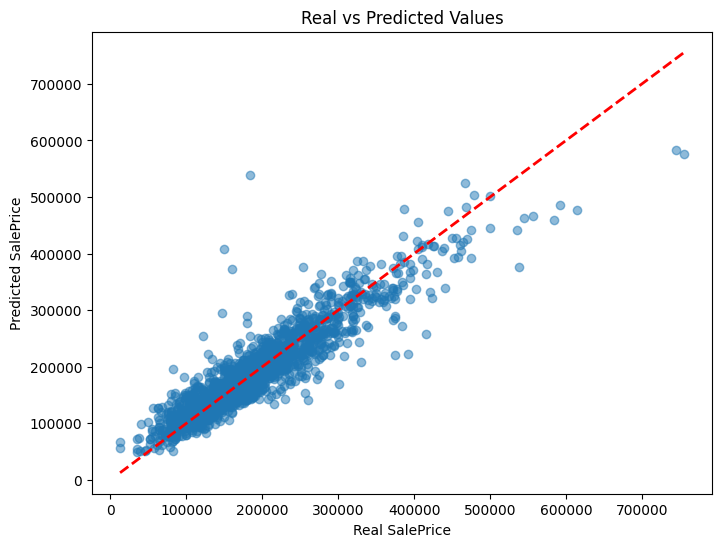

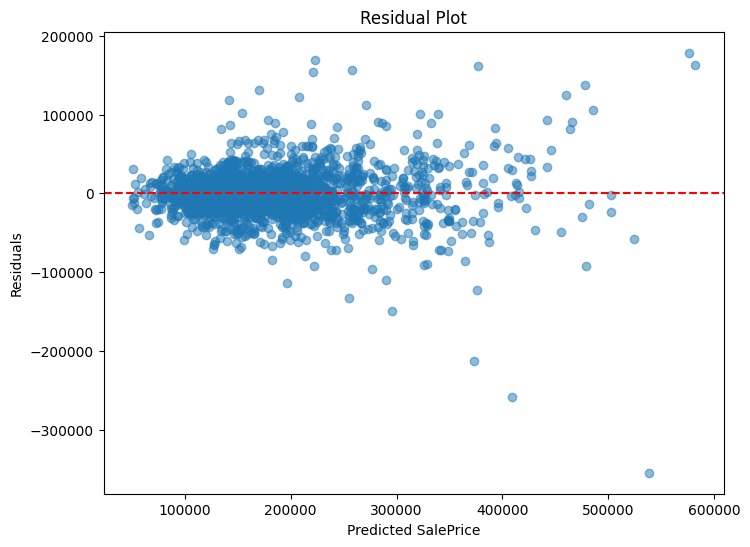

In [48]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define number of folds
k = 5

# Perform cross-validation
mae_scores = -cross_val_score(tuned_model, X_train, y_train, cv=k, scoring='neg_mean_absolute_error')
mse_scores = -cross_val_score(tuned_model, X_train, y_train, cv=k, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(tuned_model, X_train, y_train, cv=k, scoring='r2')

# Print averaged results
print(f"Cross-Validation Results ({k}-fold):")
print(f"Average MAE: {np.mean(mae_scores):.2f}")
print(f"Average MSE: {np.mean(mse_scores):.2f}")
print(f"Average R²: {np.mean(r2_scores):.4f}")

# Generate predictions for visualizations
y_pred_cv = cross_val_predict(tuned_model, X_train, y_train, cv=k)

# Visualize Real vs Predicted
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_cv, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--r', linewidth=2)
plt.title("Real vs Predicted Values")
plt.xlabel("Real SalePrice")
plt.ylabel("Predicted SalePrice")
plt.show()

# Residual Plot
residuals = y_train - y_pred_cv
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_cv, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residuals")
plt.show()


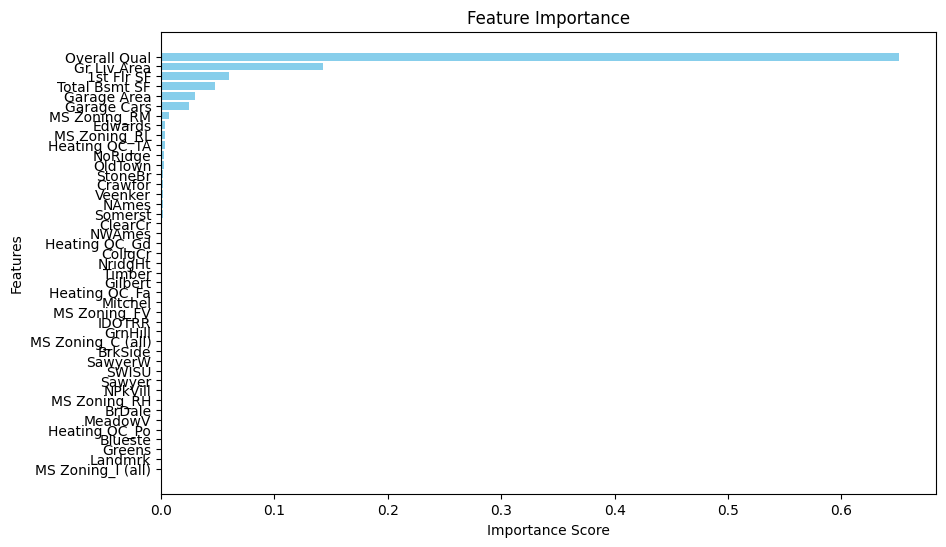

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances from the final model
importances = tuned_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


Holdout Set Evaluation:
MAE: 18033.42
MSE: 904003584.29
R²: 0.8872


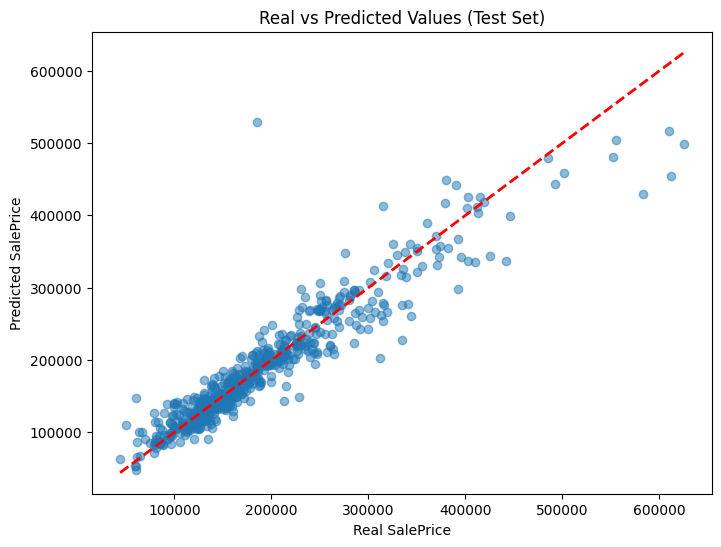

In [50]:
# Evaluate on the holdout set
y_pred_test = tuned_model.predict(X_test)

test_mae = mean_absolute_error(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print("Holdout Set Evaluation:")
print(f"MAE: {test_mae:.2f}")
print(f"MSE: {test_mse:.2f}")
print(f"R²: {test_r2:.4f}")

# Plot real vs predicted for test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title("Real vs Predicted Values (Test Set)")
plt.xlabel("Real SalePrice")
plt.ylabel("Predicted SalePrice")
plt.show()


Title: Predicting House Prices Using Machine Learning
1. Introduction
Objective: Clearly state the goal (e.g., "Build a machine learning model to predict house prices").
Dataset: Provide a brief description of the dataset, its source, and key features.
Steps Overview: Summarize the workflow you'll follow.
2. Data Exploration and Cleaning
Loading the Data: Include code to load the dataset.
Exploratory Data Analysis (EDA):
Summary statistics (mean, median, etc.).
Visualizations (e.g., histograms of SalePrice, correlations, feature distributions).
Handling Missing Data: Describe missing values and how you addressed them.
3. Feature Engineering
Numerical Features: List the numerical features selected and describe any transformations (e.g., log transformation).
Categorical Features: List the categorical features and show how you encoded them (e.g., one-hot encoding).
Additional Features: Document derived or engineered features, if any.
4. Data Preparation
Train-Test Split: Show how the data was split into training and testing sets.
Scaling and Normalization: Document which features were scaled and how (e.g., MinMaxScaler).
Final Features: Display the finalized lists of numerical_features and categorical_features.
5. Baseline Model
Objective: Introduce the baseline model (e.g., Linear Regression) to establish a performance benchmark.
Training and Results: Show metrics (MAE, MSE, R²) and discuss them briefly.
6. Advanced Modeling and Hyperparameter Tuning
Model Selection: Justify why you chose Random Forest or other advanced models.
Hyperparameter Tuning:
Explain RandomizedSearchCV or GridSearchCV.
Display the best parameters and corresponding performance metrics.
7. Cross-Validation and Final Model Evaluation
Cross-Validation: Document how cross-validation was used and summarize its results (include metrics).
Holdout Set Evaluation:
Present final metrics (MAE, MSE, R²) on the test set.
Include a Real vs Predicted Scatter Plot.
8. Feature Importance
Analysis: Present the feature importance scores from the final model.
Visualization: Include a bar chart of feature importances.
9. Conclusion
Summary: Recap the major findings (e.g., top predictors, final model performance).
Next Steps: Suggest further improvements (e.g., trying other models, more feature engineering, etc.).
10. Appendix
Include any additional details or alternate approaches not covered in the main notebook.
Additional Best Practices
Clean Code: Use consistent variable names, meaningful comments, and modular functions where possible.
Visualization: Ensure all plots have clear titles, axis labels, and legends.
Markdown Cells: Use markdown to clearly separate sections and explain code.
Interactive Outputs: If feasible, include widgets (e.g., sliders for parameter tuning) to make the notebook more interactive.